# Algorithm

## Description:
Connected components takes in a binary volume containing clusters and generates labels for those clusters. Specifically, it generates labels such that every voxel within a cluster has the same label as the other voxels within that same clusters, but a different label than all the voxels within all the other clusters.

**Inputs:** 
1. input: The input volume
2. structure: The matrix defining the maximum number of orthogonal hops to consider a pixel/voxel a neighbor (typically a 4-connectivity or 8-connectivity structure in 3D images) 
    1-connectivity:    2-connectivity:    4-connectivity:         8-connectivity:
         [ ]           [ ]  [ ]  [ ]      the 3D equivalent       the 3D equivalent of 
          |               \  |  /         of 1-connectivity       2-connectivity (can be up 
    [ ]--[x]--[ ]      [ ]--[x]--[ ]      (can be immediately     & to the left, up and to the
          |               /  |  \         up, down, left, etc.    right, down and to the left,
         [ ]           [ ]  [ ]  [ ]      of the root voxel)      etc. of the root voxel)
                         

**Outputs:**
The labeled volume, The number of components

## Pseudocode
    
       linked = []
       labels = structure with dimensions of data, initialized with the value of Background

       First pass

       for row in data:
           for column in row:
               if data[row][column] is not Background

                   neighbors = connected elements with the current element's value

                   if neighbors is empty
                       linked[NextLabel] = set containing NextLabel
                       labels[row][column] = NextLabel
                       NextLabel += 1

                   else

                       Find the smallest label

                       L = neighbors labels
                       labels[row][column] = min(L)
                       for label in L
                           linked[label] = union(linked[label], L)

       Second pass

       for row in data
           for column in row
               if data[row][column] is not Background
                   labels[row][column] = find(labels[row][column])

       return labels


## Actual Code 

In [362]:
import itertools
import sys
sys.path.insert(0, '../code/functions/')
import connectLib as cLib

def connectedComponents(volume):
    # the connectivity structure matrix
    s = [[[1 for k in xrange(3)] for j in xrange(3)] for i in xrange(3)]
    
    # find connected components
    labeled, nr_objects = ndimage.label(volume, s) 
    #change them to object type Cluster
    if nr_objects == 1: 
        nr_objects += 1
    clusterList = []
    for label in range(0, nr_objects):
        memberList = np.argwhere(labeled == label)
        if not len(memberList) == 0:
            clusterList.append(Cluster(memberList))

    return clusterList

In [364]:
import numpy as np
import math

class Cluster:
    def __init__(self, members):
        self.members = members

    def getVolume(self):
        return len(self.members)

    def getCentroid(self):
        unzipList = zip(*self.members)
        listZ = unzipList[0]
        listY = unzipList[1]
        listX = unzipList[2]
        return [np.average(listZ), np.average(listY), np.average(listX)]

    def getStdDeviation(self):
        unzipList = zip(*self.members)
        listZ = unzipList[0]
        listY = unzipList[1]
        listX = unzipList[2]
        listOfDistances = []
        for location in self.members:
            listOfDistances.append(math.sqrt((location[0]-self.centroid[0])**2 + (location[1]-self.centroid[1])**2 + (location[2]-self.centroid[2])**2))
        stdDevDistance = np.std(listOfDistances)
        return stdDevDistance

    def probSphere(self):
        unzipList = zip(*self.members)
        listZ = unzipList[0]
        listY = unzipList[1]
        listX = unzipList[2]
        volume = ((max(listZ) - min(listZ) + 1)*(max(listY) - min(listY) + 1)*(max(listX) - min(listX) + 1))
        ratio = len(self.members)*1.0/volume
        return 1 - abs(ratio/(math.pi/6) - 1)

    def getMembers(self):
        return self.members

## Connected Components Conditions
Connected Components would work well under the conditions that the input volume contains seperable, non-overlapping, sparse clusters and that the input volume is in binary-form (i.e. the values of the background voxels are 0's and the value of the foreground voxels are all positive integers). 

Connected Components would work poorly if the volume is not binary (i.e. the values of the background voxels are anything besides 0) or if the clusters are dense or in any way neighboring eachother. 

## Predictable Data Sets

**The Good Data Set:**

**Description:** The good data set is a 1000 x 1000 x 100 volume containing 1875 clusters of size 125 with value of 1. Every other value in the volume is 0. 

**Plot:** I will plot the data at z=5 because it provides better visualization.

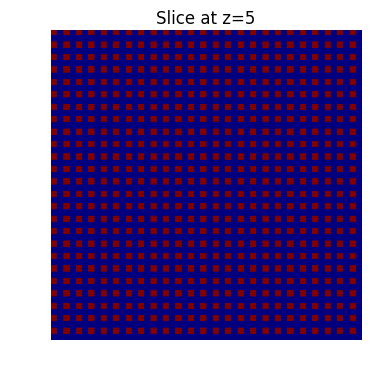

In [80]:
import numpy as np
import matplotlib.pyplot as plt

clusterGrid = np.zeros((100, 1000, 1000))
for i in range(40):
    for j in range(40):
        for k in range(40):
            clusterGrid[20*(2*j): 20*(2*j + 1), 20*(2*i): 20*(2*i + 1), 20*(2*k): 20*(2*k + 1)] = 1
            
plt.imshow(clusterGrid[5])
plt.axis('off')
plt.title('Slice at z=5')
plt.show()

**Prediction:** I predict that this volume will be perfectly segmented into 1875 clusters.

**The Difficult Data Set:**

**Description:** The good data set is a 1000 x 1000 x 100 volume containing 1875 clusters of size 125 with value of 2. Every other value in the volume is 1. In other words, the image is not binarized.

**Plot:** I will plot the data at z=5 because it provides better visualization.

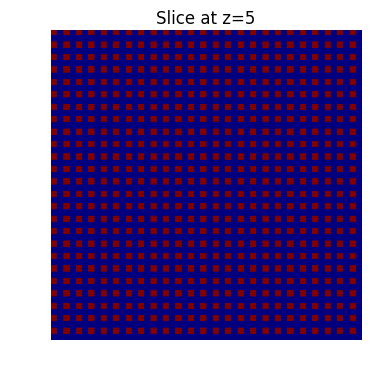

In [75]:
clusterGrid = clusterGrid + 1
plt.imshow(clusterGrid[5])
plt.axis('off')
plt.title('Slice at z=5')
plt.show()

**Prediction:** I predict that the entire volume will be segmented into one big component.

# Simulation
## Toy Data Generation

**The Good Data Set:**

In [95]:
simEasyGrid = np.zeros((100, 100, 100))
for i in range(4):
    for j in range(4):
        for k in range(4):
            simEasyGrid[20*(2*j): 20*(2*j + 1), 20*(2*i): 20*(2*i + 1), 20*(2*k): 20*(2*k + 1)] = 1

**Predicting what good data will look like:** I believe the good data will look like a grid of 27 cubes, 9 in each slice that contains clusters.

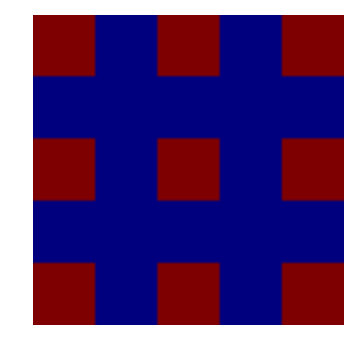

In [96]:
plt.imshow(simEasyGrid[5])
plt.axis('off')
plt.show()

**Visualization relative to prediction:** As predicted, the good data looks like a grid of cubes, 9 in each slice that contains clusters.

**The Difficult Data Set:**

In [97]:
simDiffGrid = simEasyGrid + 1

**Predicting what difficult data will look like:** I believe the good data will look like a grid of 27 cubes, 9 in each slice that contains clusters.

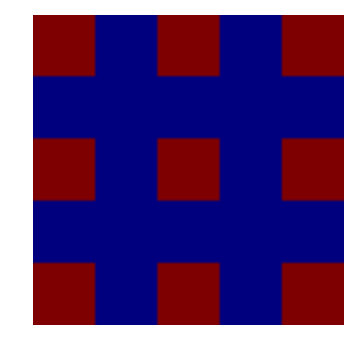

In [98]:
plt.imshow(simDiffGrid[5])
plt.axis('off')
plt.show()

**Visualization relative to prediction:** As predicted, the difficult data looks like a grid of cubes, 9 in each slice that contains clusters.

### Toy Data Analysis
**Good Data Prediction: ** 
I predict that the good data will segment the easy simulation into 27 clusters very quickly.

In [347]:
def connectAnalysis(rawData, expected):
    start_time = time.time()
    clusterList = connectedComponents(rawData)
    print "time taken to label: " + str((time.time() - start_time)) + " seconds"
    print "Number of connected components:\n\tExpected: " + expected + "\n\tActual: " + str(len(clusterList))
    displayIm = np.zeros_like(rawData)
    for cluster in range(len(clusterList)):
        for member in range(len(clusterList[cluster].members)):
            z, y, x = clusterList[cluster].members[member]
            displayIm[z][y][x] = cluster

    plt.imshow(displayIm[0])
    plt.axis('off')
    plt.show()

time taken to label: 0.175865888596 seconds
Number of connected components:
	Expected: 27
	Actual: 27


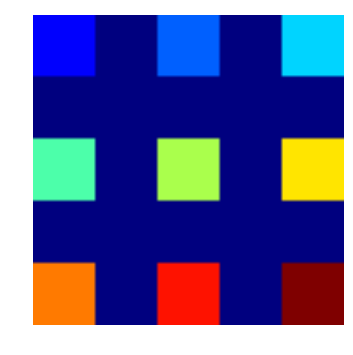

In [366]:
connectAnalysis(simEasyGrid, '27')

**Results of Good Data Relative to Predictions:** As expected, the volume was segmented into 27 seperate clusters very quickly.

**Repeating the Good Data Simulation:**

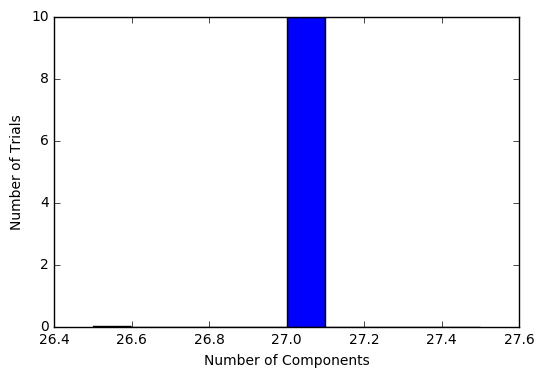

Average Number of Components on Easy Simulation Data:
	Expected: 27	Actual: 27.0


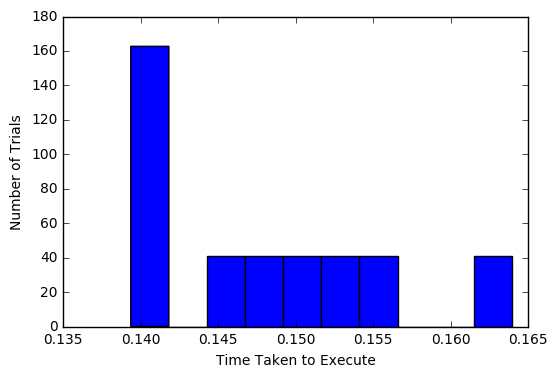

Average Time Taken to Execute: 0.147708630562


In [367]:
%matplotlib inline
import matplotlib.pyplot as plt
import pylab
labeledLengths = []
times = []

for i in range(10):
    start_time = time.time()
    clusterList = connectedComponents(simEasyGrid)
    labeledLengths.append(len(clusterList))
    times.append((time.time() - start_time))
    

pylab.hist(labeledLengths, normed=1)
pylab.xlabel('Number of Components')
pylab.ylabel('Number of Trials')
pylab.show()
print 'Average Number of Components on Easy Simulation Data:\n\tExpected: 27\tActual: ' + str(np.mean(labeledLengths))


pylab.hist(times, normed=1)
pylab.xlabel('Time Taken to Execute')
pylab.ylabel('Number of Trials')
plt.show()
print 'Average Time Taken to Execute: ' + str(np.mean(times))

**Difficult Data Prediction:** I predict the difficult data will be segmented into 1 big cluster.

time taken to label: 0.0953691005707 seconds
Number of connected components:
	Expected: 1
	Actual: 1


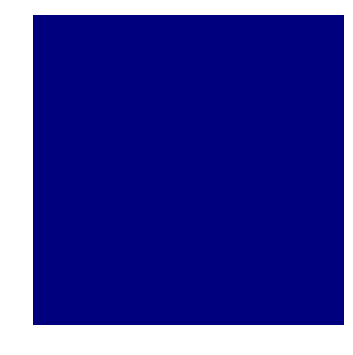

In [369]:
connectAnalysis(simDiffGrid, '1')

**Results of Difficult Data Result Relative to Prediction:** As expected, the volume was segmented into one big component.

**Repeating the Difficult Data Simulation:**

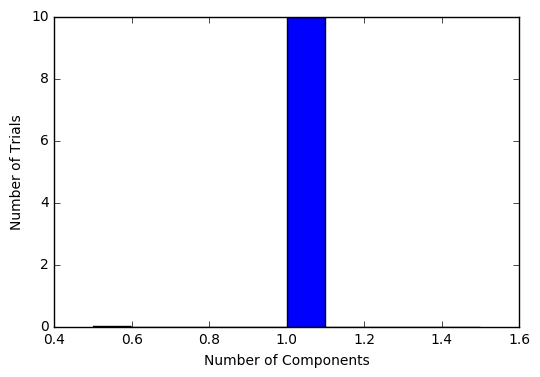

Average Number of Components on Difficult Simulation Data:
	Expected: 27	Actual: 1.0


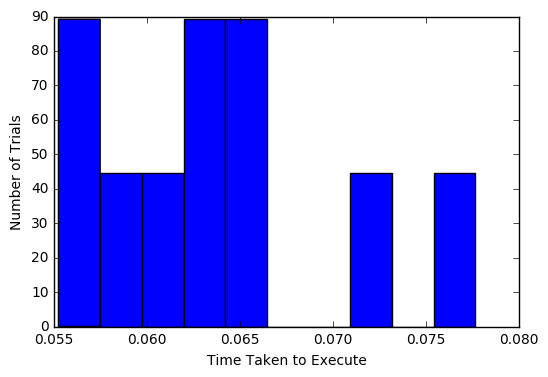

Average Time Taken to Execute: 0.0637949705124


In [370]:
%matplotlib inline
import matplotlib.pyplot as plt
import pylab
labeledLengths = []
times = []

for i in range(10):
    start_time = time.time()
    clusterList = connectedComponents(simDiffGrid)
    labeledLengths.append(len(clusterList))
    times.append((time.time() - start_time))
    

pylab.hist(labeledLengths, normed=1)
pylab.xlabel('Number of Components')
pylab.ylabel('Number of Trials')
pylab.show()
print 'Average Number of Components on Difficult Simulation Data:\n\tExpected: 27\tActual: ' + str(np.mean(labeledLengths))


pylab.hist(times, normed=1)
pylab.xlabel('Time Taken to Execute')
pylab.ylabel('Number of Trials')
plt.show()
print 'Average Time Taken to Execute: ' + str(np.mean(times))

**Summary of Performances:** Connected Components performed extremely well on the easy simulation, correctly detecting 27 components very quickly for every trial. It also performed poorly as expected on the difficult simulation, connecting 1 component for every trial

# Real Data
## Synthetic Data Analysis
**Description:** Validation testing will be performed on a a 100x100x100 volume with a pixel intensity distribution approximately the same as that of the true image volumes (i.e., 98% background, 2% synapse). The synapse pixels will be grouped together in clusters as they would in the true data. Based on research into the true size of synapses, these synthetic synapse clusters will be given area of ~1 micron ^3, or about 139 voxels (assuming the synthetic data here and the real world data have identical resolutions). After the data goes through the algorithm, I will gauge performance based on the following:
number of clusters (should be about 500)
volumetric density of data (should be about 2% of the data)

**Plotting Raw Synthetic Data:**

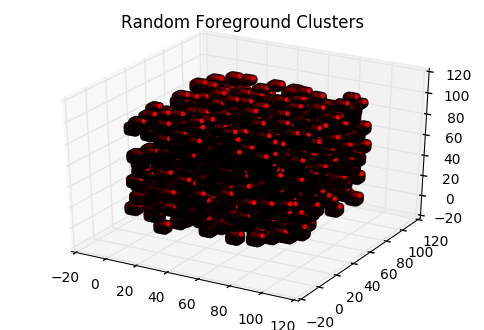

In [152]:
from random import randrange as rand

def generatePointSet():
    center = (rand(0, 99), rand(0, 99), rand(0, 99))
    toPopulate = []
    for z in range(-1, 5):
        for y in range(-1, 5):
            for x in range(-1, 5):
                curPoint = (center[0]+z, center[1]+y, center[2]+x)
                #only populate valid points
                valid = True
                for dim in range(3):
                    if curPoint[dim] < 0 or curPoint[dim] >= 100:
                        valid = False
                if valid:
                    toPopulate.append(curPoint)
    return set(toPopulate)
    
def generateTestVolume():
    #create a test volume
    volume = np.zeros((100, 100, 100))
    myPointSet = set()
    for _ in range(rand(500, 800)):
        potentialPointSet = generatePointSet()
        #be sure there is no overlap
        while len(myPointSet.intersection(potentialPointSet)) > 0:
                potentialPointSet = generatePointSet()
        for elem in potentialPointSet:
            myPointSet.add(elem)
    #populate the true volume
    for elem in myPointSet:
        volume[elem[0], elem[1], elem[2]] = 60000
    #introduce noise
    noiseVolume = np.copy(volume)
    for z in range(noiseVolume.shape[0]):
        for y in range(noiseVolume.shape[1]):
            for x in range(noiseVolume.shape[2]):
                if not (z, y, x) in myPointSet:
                    noiseVolume[z][y][x] = rand(0, 10000)
    return volume

foreground = generateTestVolume()


#displaying the random clusters
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
z, y, x = foreground.nonzero()
ax.scatter(x, y, z, zdir='z', c='r')
plt.title('Random Foreground Clusters')
plt.show()

**Expectation for Synthetic Data:** I expect that the Connected Components will detect around 500 clusters.

**Running Algorithm on Synethetic Data:**

time taken to label: 1.91752910614 seconds
Number of connected components:
	Expected: Around 500
	Actual: 494


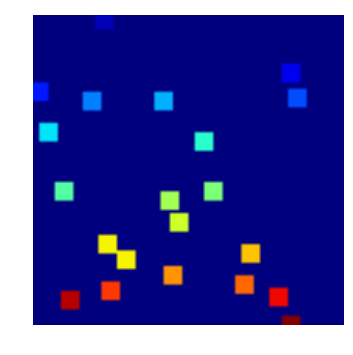

In [371]:
connectAnalysis(foreground, "Around 500")

**Results on Synthetic Data Relative to Prediction:** The data correctly detected around 500 connected components. More importantly, it did so extremely quickly.

In [354]:
import sys
sys.path.insert(0,'../code/functions/')
import tiffIO as tIO
import connectLib as cLib
import plosLib as pLib

data0 = tIO.unzipChannels(tIO.loadTiff('../data/SEP-GluA1-KI_tp1.tif'))[0][0:5]

In [355]:
data = np.array(data0)

In [356]:
#finding the clusters after plosPipeline
plosOut = pLib.pipeline(data0)

In [357]:
#binarize output of plos lib
bianOut = cLib.otsuVox(plosOut)

In [358]:
#dilate the output based on neigborhood size
bianOut = ndimage.morphology.binary_dilation(bianOut).astype(int)

time taken to label: 39.416656971 seconds
Number of connected components:
	Expected: Around 2 thousand
	Actual: 1833


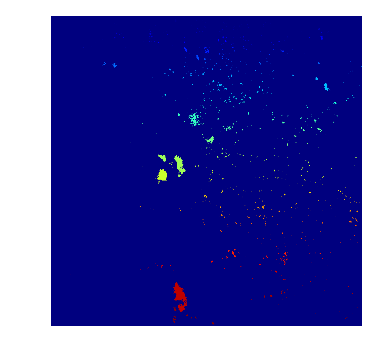

In [372]:
connectAnalysis(bianOut, 'Around 2 thousand')